Predicting the likelihood of E-Signing a Loan based on financial history

Lending companies work by analyzing the financial history of their loan applicants, and choosing whether or not the applicant is too risky to be given a loan. If the applicant is not, the company then determines the terms of the loan. To acquire these applicants, companies can organically receive them through their websites/apps, often with the help of advertisement campaigns. Other times, lending companies partner with peer-to-peer (P2P) lending marketplaces, in order to acquire leads of possible applicants. 

Market: The target audience is the set of loan applicants who reached out through an intermediary marketplace.

Product: A loan

Goal: Develop a model to predict for 'quality' applicants. In this case study, 'quality' applicants are those who reach a key part of the loan application process.

Here, the goal is to create a model that predicts whether or not the applicants will complete the electronic signature phase of the loan application (e_signed). 

The official application begins with the lead arriving into our website after we opted to acquire it. Here, the applicant begins the onboarding process to apply for a loan. The user begins to provide more financial information by going over screen of the onboarding process. This first phase ends with the applicant providing his/her signature indicating all of the given information is correct.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time

In [2]:
random.seed(100)

In [3]:
dataset = pd.read_csv(r"D:\ALY 6020 Predictive Analytics\loan\Financial_Dataset.csv")

In [4]:
#Conducting Exploratory Data Analysis
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [5]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [6]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [7]:
# Cleaning Data
# Removing NaN
dataset.isna().any()


entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [8]:
#removing categorical variables to create histograms
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

In [9]:
import math

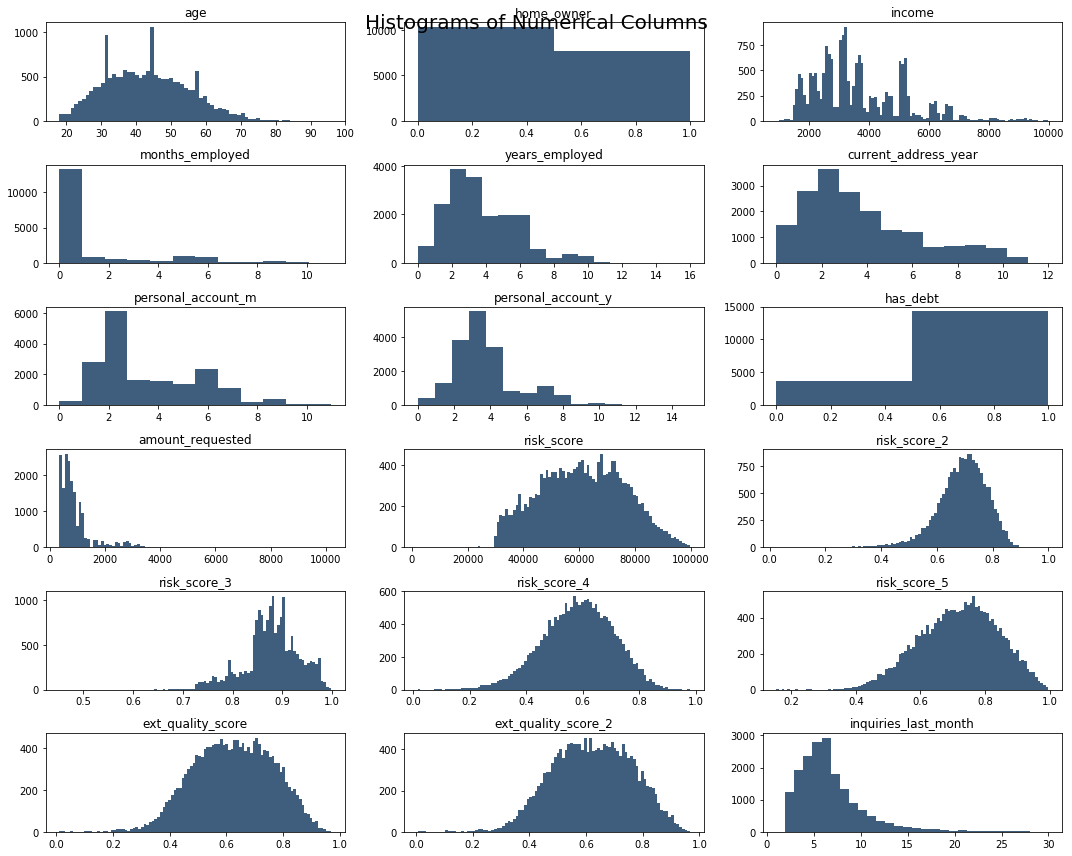

In [10]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]): #for each of the columns we are creating subplots
    plt.subplot(6, 3, i + 1) 
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:, i].unique()) #if there is more then 100 unique values then number of bins are going to fall 100
    if vals >= 100:
        vals = 100
       
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
    fig.tight_layout()
#     plt.tight_layout(fig, rect=[0, 0, 0.5, 1])
#     plt.tight_layout(pad=3.0)
    
    

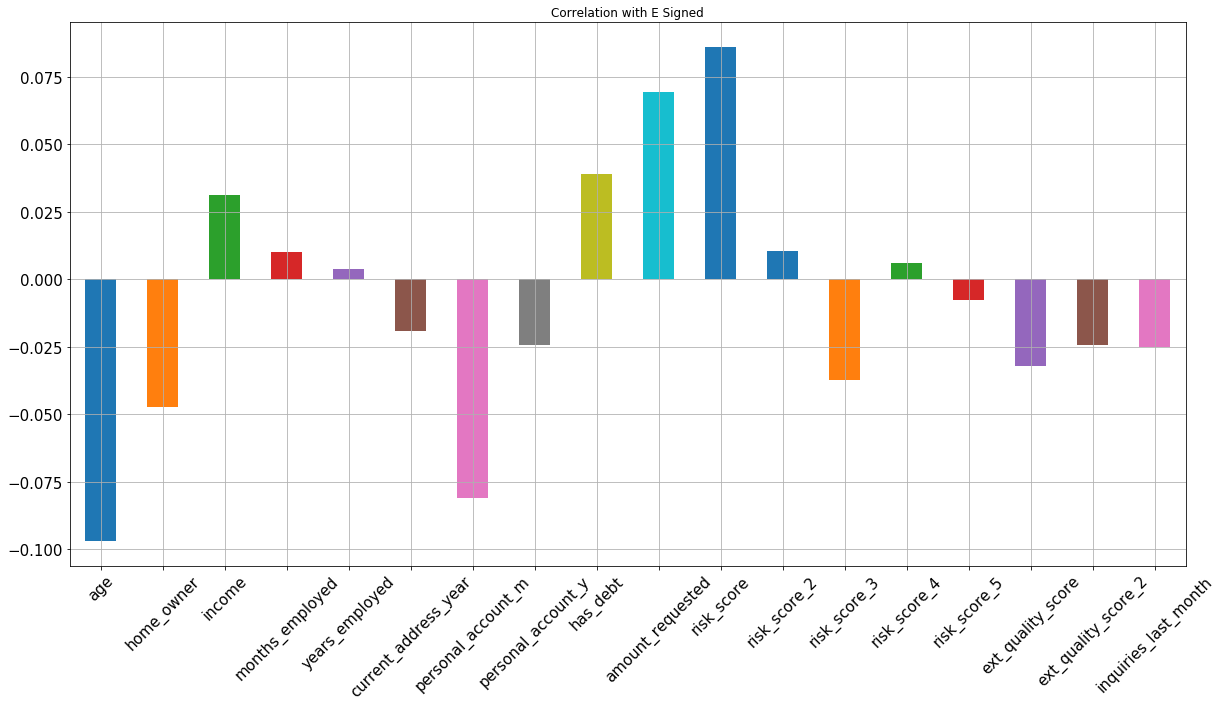

In [11]:
#Correlation with Response Variable
dataset2.corrwith(dataset.e_signed).plot.bar(
        figsize = (20, 10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

The above corelation is linear in nature.

If it's negative in nature that means as the varibale increases the likelihood of the response variable being positive decreases.
And if it's positive the variable increases the likelihood of the response variable being positive increases.

Age seems to be very powerfully correlated with the response variable being negative meaning that as a person grow older they are less likely to put up with entire onboarding process and get to the final stage (The final screening).

The home owner is negatively correlated with esign. If a person is home owner they are less likely to reach the final step of the process

The income is positive correlated

The personal account is negatively corelated 

If a person has a debt like they owe money on their credit cards then they're more likely to on board

The more amount one has requested the more they are likely to get on board 

As the initial risk score increases their relationship with the response variable increases

In [12]:
#corelation matrix
sn.set(style="white")

In [13]:
# Computing the correlation matrix
corr = dataset2.corr()

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


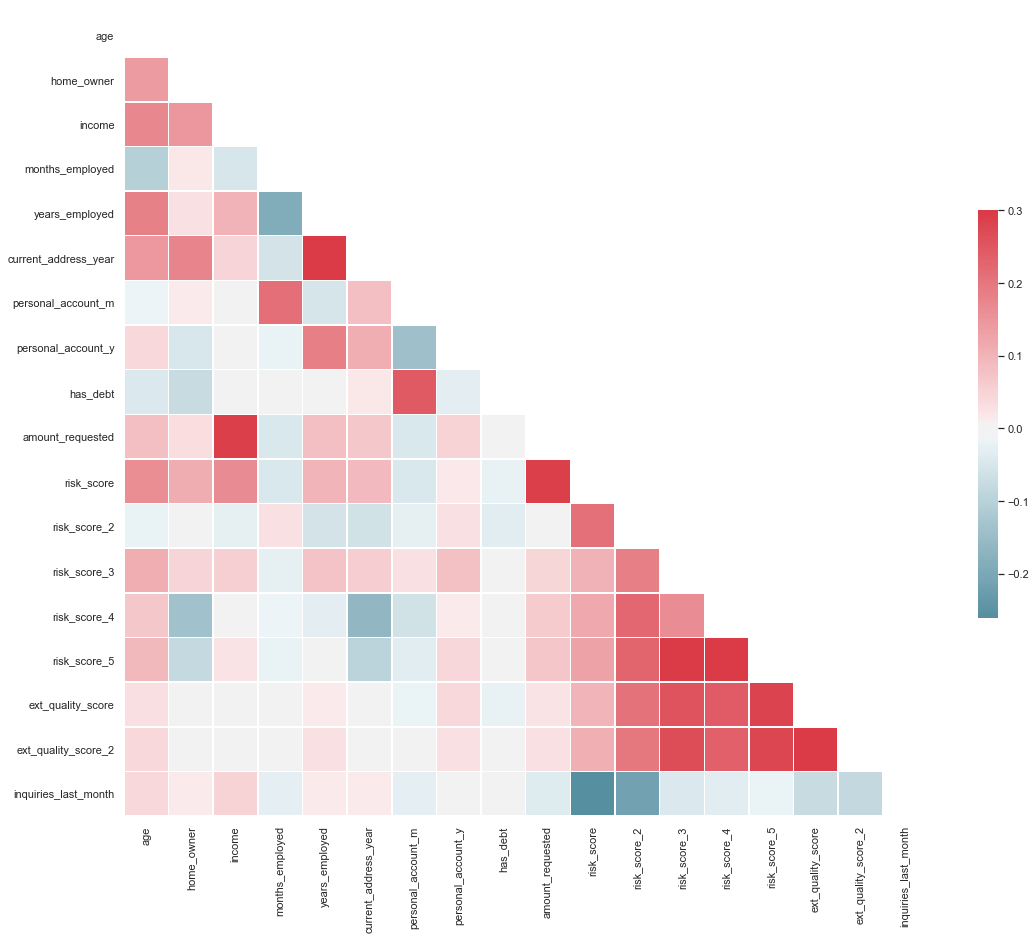

In [15]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation plot states that:
The age has a very light correlation with all the other columns
Age has a positive correlation with income.

The home_owner doesn't have much strong corelation.

The income and amount_requested has a strong corelation, The more income a person make in a month the more likely they are to request higher amounts of money for the loan application.

The years_employed is strongly corelated with current_address_year. (For example: if you are employed for a decade in the same job that means that odds are you're going to be living in the same state or city where the job is located for a long time too).

The amount_requested is strongly correlated with the first rescore which makes sense because we know that risk score depends on many multiple features and each of them is different. So it makes sense that atleast one of them especially that the first risk score is dependent on the amount requested.

The risk_score is somewhat related to the other risk_score and negatively related to the inquiries_last_month.

The rest risk_scores are all related to each other this makes sense because all the other risk_scores are built independently and with different features.

The odds are that if the risk_score is high, very very high for one, it's going to be somewhat higher for the other ones as well.

There may be some correlation because if someone is a flat or horrible applicant and have the worst financial history ever then they're going to be failing or getting low scores on a lot of these risk_scores even the ones that come in from the marketplace.

So even if one is a good performer like a quality applicant odds are they are going to get good grades on multiple those scores. Hence, they are correlated.



In [17]:
#feature engineering
#getting rid of the columns that we found to be kind of faulty
dataset = dataset.drop(columns=['months_employed'])
dataset['personal_account_months']= (dataset.personal_account_m + (dataset.personal_account_y * 12))

We have a column called personal_account_m that tells us how many months the person has had in their personal account and we have 
a similar column called personal_Account_y that tells us how many years the person has had with that credit card that they have. 
This is a 2 part dataset. So, if a person has been in with that credit card for two years and two months or two years in three 
months then one column would say two years and the other column will say 3 months. So, in order to get a more centralized field 
that has to represents a time since greater account was created, we're going to combine these two columns and convert it into a
overall months columns.

In [19]:
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [20]:
dataset = dataset.drop(columns= ['personal_account_m','personal_account_y'])

The next step includes one hot encoding where I leveraged the pandas function that get dummys. They're going to find all the 
categorical variables and then the metric and it's going to encode them into their own dummy variables 

In [22]:
#One Hot Encoding
dataset= pd.get_dummies(dataset)

In [23]:

dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [24]:
#Avoiding the dummy variable trap
#if we keep all the payment columns they are going to be now dependent column not linearly independent columns which is what
#we want so by removing one of them we make them linearly independent again

dataset = dataset.drop(columns= ["pay_schedule_semi-monthly"])


In [25]:
#removing extra columns
response = dataset["e_signed"]
users = dataset["entry_id"]
dataset= dataset.drop(columns=["e_signed", "entry_id"])

In [26]:
#splitting into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, 
                                                   response,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [28]:
#model building
#logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty='l1')
classifier.fit(X_train,y_train)

C:\Users\Shraddha\Documents\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#predicting test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc= accuracy_score(y_test, y_pred)
prec= precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

In [30]:
results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [31]:
#SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel='linear')
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
#predicting test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc= accuracy_score(y_test, y_pred)
prec= precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

In [33]:
model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [34]:
results = results.append(model_results, ignore_index = True)

In [35]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.568398,0.578536,0.729772,0.645413


In [36]:
#SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel='rbf')
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
#predicting test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc= accuracy_score(y_test, y_pred)
prec= precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

In [38]:
model_results = pd.DataFrame([['SVM (rbf)', acc, prec, rec, f1]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [39]:
results = results.append(model_results, ignore_index = True)

In [40]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.568398,0.578536,0.729772,0.645413
2,SVM (rbf),0.592686,0.607519,0.687241,0.644926


In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators=100, criterion = 'entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
#predicting test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc= accuracy_score(y_test, y_pred)
prec= precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

In [43]:
model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [44]:
results = results.append(model_results, ignore_index = True)

In [45]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.568398,0.578536,0.729772,0.645413
2,SVM (rbf),0.592686,0.607519,0.687241,0.644926
3,Random Forest (n=100),0.623953,0.643741,0.674793,0.658901


In [46]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std()*2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


In [47]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.568398,0.578536,0.729772,0.645413
2,SVM (rbf),0.592686,0.607519,0.687241,0.644926
3,Random Forest (n=100),0.623953,0.643741,0.674793,0.658901


Hence, Random Forest suits best to the dataset.

Test Data Accuracy: 0.6240


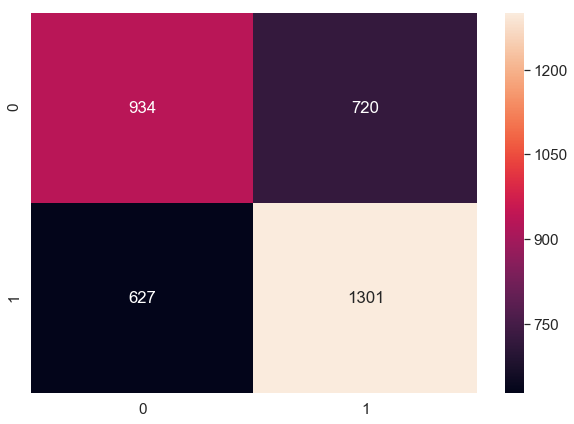

In [48]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [49]:
#End of Model
# Formatting Final Results

final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]


In [50]:
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,1
12,6889184,1.0,0
16,9375601,0.0,1
18,8515555,1.0,1
31,2881357,0.0,0
33,7048193,1.0,1
37,5815308,1.0,1
44,8700190,1.0,1
45,8232654,0.0,0
